# Problem Statement

### Zudio is a fast-fashion retail clothing brand offering trendy and affordable apparel for men, women, and kids. With a wide range of casual, formal, and seasonal wear, the brand aims to cater to diverse customer preferences across multiple store formats and locations.

### The objective of this project is to perform Exploratory Data Analysis (EDA) on Zudio’s sales data to uncover meaningful insights into sales trends, product performance, and customer purchasing behavior. By analyzing historical sales patterns, category-wise performance, store-level metrics, and time-based trends, this study seeks to identify key drivers of revenue and profitability.

### The dataset includes attributes such as product categories, pricing, quantities sold, store characteristics, customer demographics, and purchase history. Through data cleaning, feature engineering, and visualization, the analysis aims to highlight growth opportunities, high-performing segments, and operational insights that can support data-driven decision-making.

### The findings from this analysis can help Zudio optimize inventory planning, improve store performance, refine pricing strategies, and enhance overall customer satisfaction, thereby strengthening its market presence.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Zudio_sales_data.csv")

In [5]:
df.head()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


In [7]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 7899
Columns: 28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      7899 non-null   object 
 1   Country                    7899 non-null   object 
 2   State                      7899 non-null   object 
 3   City                       7899 non-null   object 
 4   Category                   7899 non-null   object 
 5   Clothing Type              7899 non-null   object 
 6   Store Number               7899 non-null   int64  
 7   Postal Code                7899 non-null   int64  
 8   Store Type                 7899 non-null   object 
 9   Store Open Date            7899 non-null   object 
 10  Selling Area Size (sq ft)  7899 non-null   int64  
 11  Store Manager              7899 non-null   object 
 12  Manager ID                 7899 non-null   object 
 13  Store Address              7899 non-null   objec

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['store', 'country', 'state', 'city', 'category', 'clothing_type',
       'store_number', 'postal_code', 'store_type', 'store_open_date',
       'selling_area_size_(sq_ft)', 'store_manager', 'manager_id',
       'store_address', 'contact_information', 'operating_hours',
       'staff_count', 'parking_availability', 'security_features', 'order_id',
       'order_date', 'month', 'customer_id', 'customer_name', 'product_id',
       'price', 'quantity', 'sales_profit'],
      dtype='object')

In [10]:
df.isnull().sum().sort_values(ascending=False)

security_features            2038
store                           0
state                           0
country                         0
category                        0
clothing_type                   0
store_number                    0
postal_code                     0
store_type                      0
store_open_date                 0
selling_area_size_(sq_ft)       0
city                            0
store_manager                   0
manager_id                      0
contact_information             0
store_address                   0
operating_hours                 0
staff_count                     0
parking_availability            0
order_id                        0
order_date                      0
month                           0
customer_id                     0
customer_name                   0
product_id                      0
price                           0
quantity                        0
sales_profit                    0
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100

store                         0.000000
country                       0.000000
state                         0.000000
city                          0.000000
category                      0.000000
clothing_type                 0.000000
store_number                  0.000000
postal_code                   0.000000
store_type                    0.000000
store_open_date               0.000000
selling_area_size_(sq_ft)     0.000000
store_manager                 0.000000
manager_id                    0.000000
store_address                 0.000000
contact_information           0.000000
operating_hours               0.000000
staff_count                   0.000000
parking_availability          0.000000
security_features            25.800734
order_id                      0.000000
order_date                    0.000000
month                         0.000000
customer_id                   0.000000
customer_name                 0.000000
product_id                    0.000000
price                    

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop_duplicates()

In [14]:
df.describe()

,store_number,postal_code,selling_area_size_(sq_ft),staff_count,order_id,customer_id,product_id,price,quantity,sales_profit
count,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000
mean,50.666034,419982.374984,1112.077478,11.504747,54920.719965,549440.714521,602.069376,1761.113432,4.519433,3170.671376
std,29.095274,11695.237817,193.239371,5.194722,25894.206850,262418.912565,232.066189,716.269447,2.292373,2141.249886
min,1.000000,400006.000000,800.000000,3.000000,10008.000000,100153.000000,204.000000,499.000000,1.000000,200.400000
25%,25.000000,409841.000000,950.000000,7.000000,33192.000000,318516.500000,398.000000,1136.000000,3.000000,1411.200000
50%,51.000000,419988.000000,1100.000000,12.000000,54873.000000,546012.000000,602.000000,1782.000000,5.000000,2681.600000
75%,76.000000,430258.000000,1300.000000,16.000000,77285.000000,780304.000000,803.500000,2373.000000,7.000000,4570.400000
max,100.000000,439985.000000,1400.000000,20.000000,99999.000000,999858.000000,999.000000,2999.000000,8.000000,9596.800000


In [15]:
df.describe(include="object")

,store,country,state,city,category,clothing_type,store_type,store_open_date,store_manager,manager_id,store_address,contact_information,operating_hours,parking_availability,security_features,order_date,month,customer_name
count,7899,7899,7899,7899,7899,7899,7899,7899,7899,7899,7899,7899,7899,7899,5861,7899,7899,7899
unique,1,1,8,42,3,11,2,1774,7476,100,7899,7899,4,2,3,338,12,7499
top,Zudio,India,Rajasthan,Kolkata,Kids,Dresses,Rented,2022-12-09,James Johnson,M41,"380 Shannon Prairie North Alexanderhaven, AL 4...",+1-594-976-4740x64597,10 AM - 7 PM,Not Available,"CCTV, Alarm",2024-08-28,October,Christopher Smith
freq,7899,7899,1013,210,2673,748,3974,12,5,108,1,1,2053,3966,1998,37,743,5


In [16]:
df['store_open_date'] = pd.to_datetime(df['store_open_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

In [17]:
df['order_year'] = df['order_date'].dt.year
df['order_month_num'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_weekday'] = df['order_date'].dt.day_name()

In [18]:
df['revenue'] = df['price'] * df['quantity']

In [19]:
df['profit_margin_%'] = (df['sales_profit'] / df['revenue']) * 100

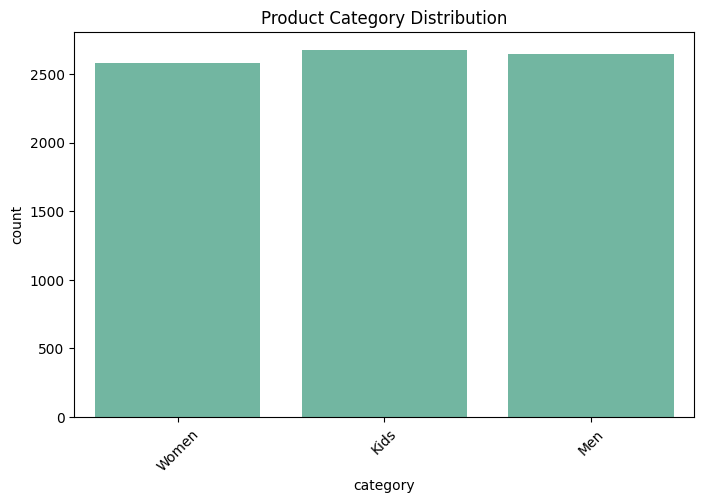

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='category')
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# by the above graph, we can see that 'Apparel' category has the highest number of products sold, followed by 'Footwear' and 'Accessories'.

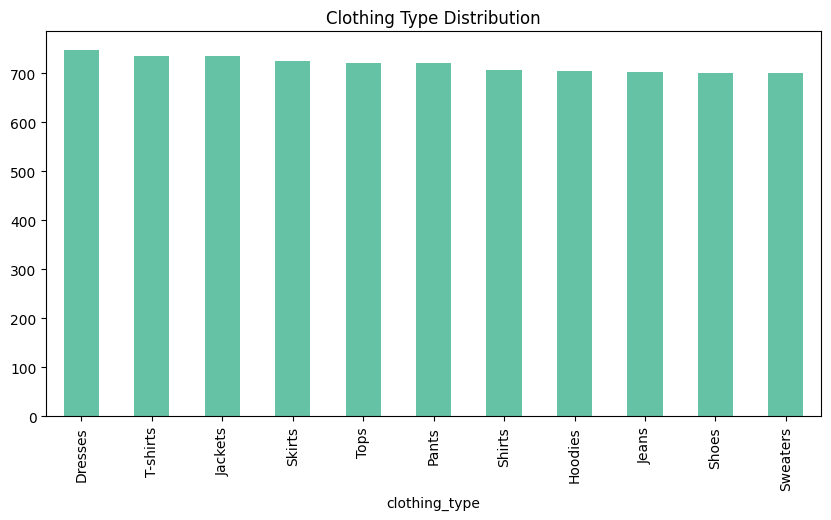

In [ ]:
plt.figure(figsize=(10,5))
df['clothing_type'].value_counts().plot(kind='bar')
plt.title("Clothing Type Distribution")
plt.show()

# by this graph, we can see that Dresses are the most popular clothing type, followed by T-shirt and jackets.

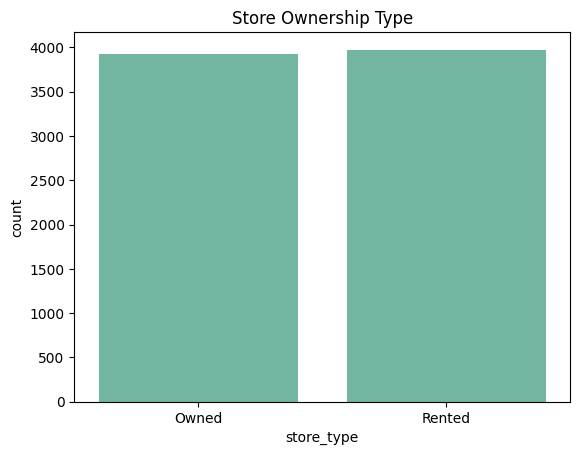

In [ ]:
sns.countplot(data=df, x='store_type')
plt.title("Store Ownership Type")
plt.show()

# This graph shows that most of the stores are Rented, but owned stores also have the almost same presence.

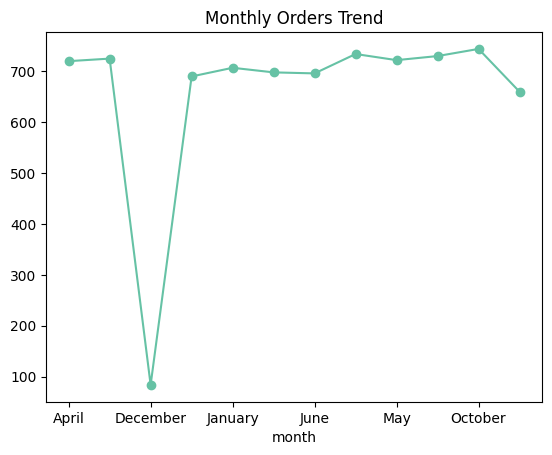

In [23]:
df['month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Monthly Orders Trend")
plt.show()

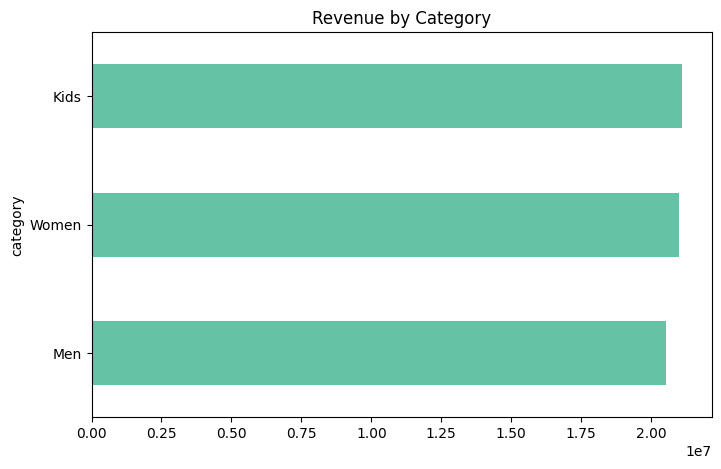

In [24]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values()

category_revenue.plot(kind='barh', figsize=(8,5))
plt.title("Revenue by Category")
plt.show()

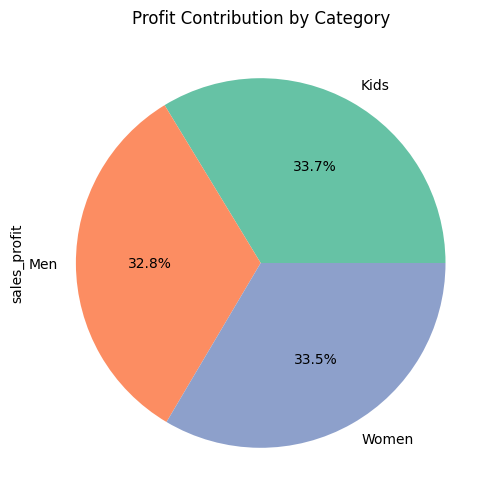

In [25]:
profit_by_category = df.groupby('category')['sales_profit'].sum()

profit_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Profit Contribution by Category")
plt.show()

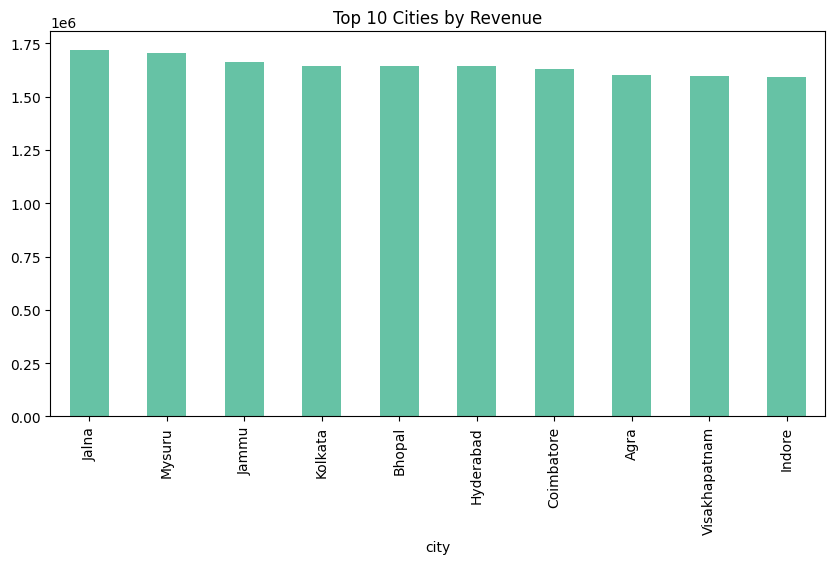

In [26]:
top_cities = df.groupby('city')['revenue'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Cities by Revenue")
plt.show()

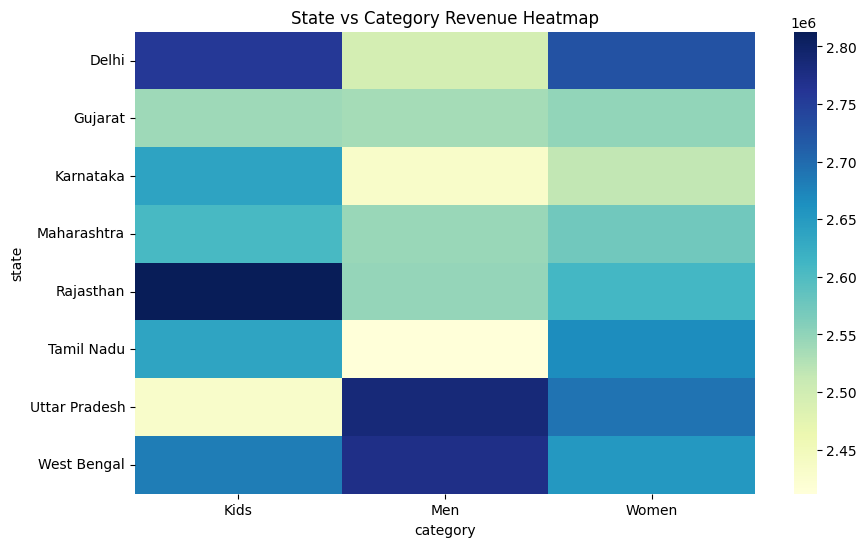

In [27]:
pivot_state_category = pd.pivot_table(
    df, values='revenue', index='state', columns='category', aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_state_category, cmap='YlGnBu')
plt.title("State vs Category Revenue Heatmap")
plt.show()

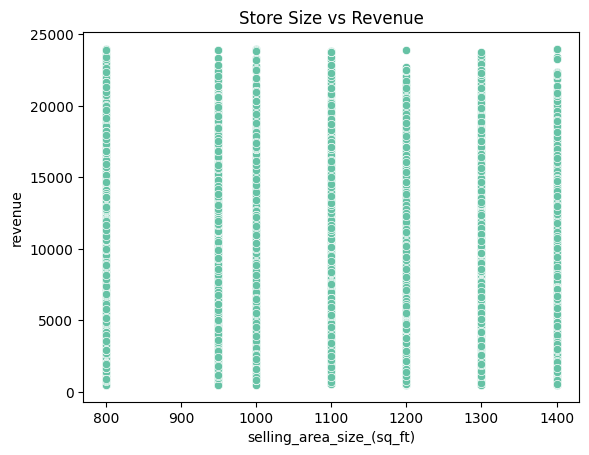

In [28]:
sns.scatterplot(
    data=df,
    x='selling_area_size_(sq_ft)',
    y='revenue'
)
plt.title("Store Size vs Revenue")
plt.show()

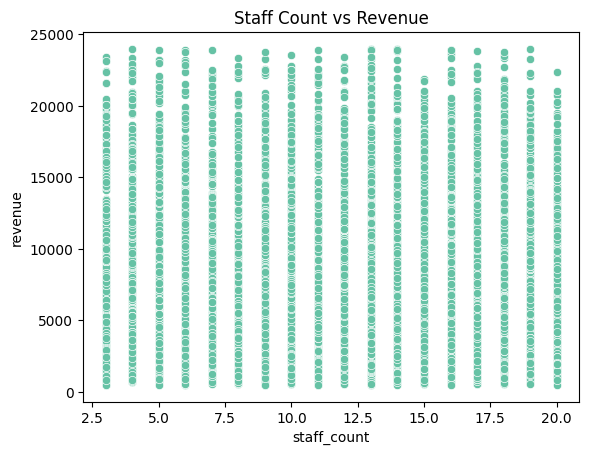

In [29]:
sns.scatterplot(data=df, x='staff_count', y='revenue')
plt.title("Staff Count vs Revenue")
plt.show()

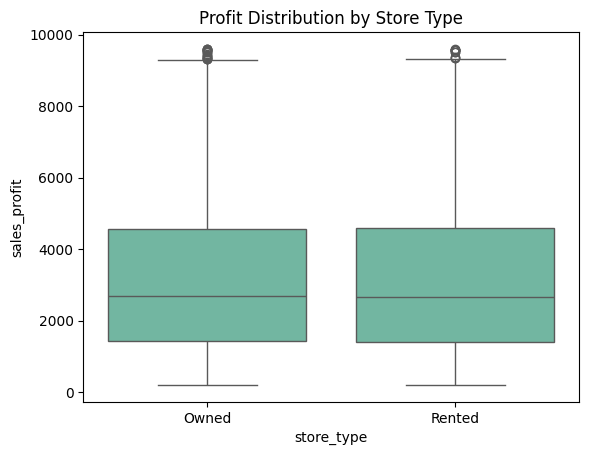

In [30]:
sns.boxplot(data=df, x='store_type', y='sales_profit')
plt.title("Profit Distribution by Store Type")
plt.show()

In [31]:
df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).head(10)

customer_name
Jonathan Brown       52476
Christopher Smith    51413
Michael Williams     48810
Sarah Smith          46633
Mary Smith           40921
Jessica Jones        39027
Melissa Taylor       38640
Lisa Smith           37536
Michael Stewart      35589
Matthew Williams     34544
Name: revenue, dtype: int64

In [32]:
df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

product_id
970    102
258     99
740     92
629     91
542     89
963     87
414     87
991     87
652     86
288     86
Name: quantity, dtype: int64

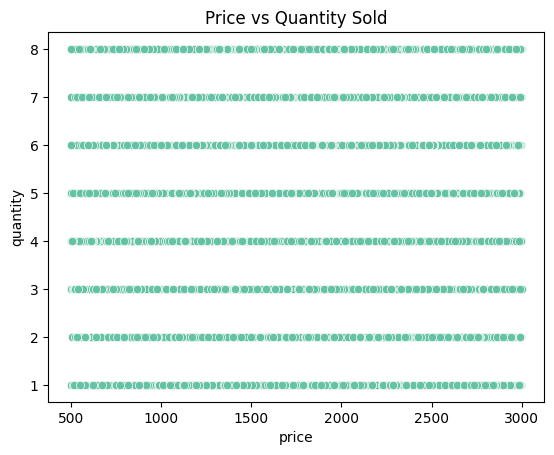

In [33]:
sns.scatterplot(data=df, x='price', y='quantity')
plt.title("Price vs Quantity Sold")
plt.show()

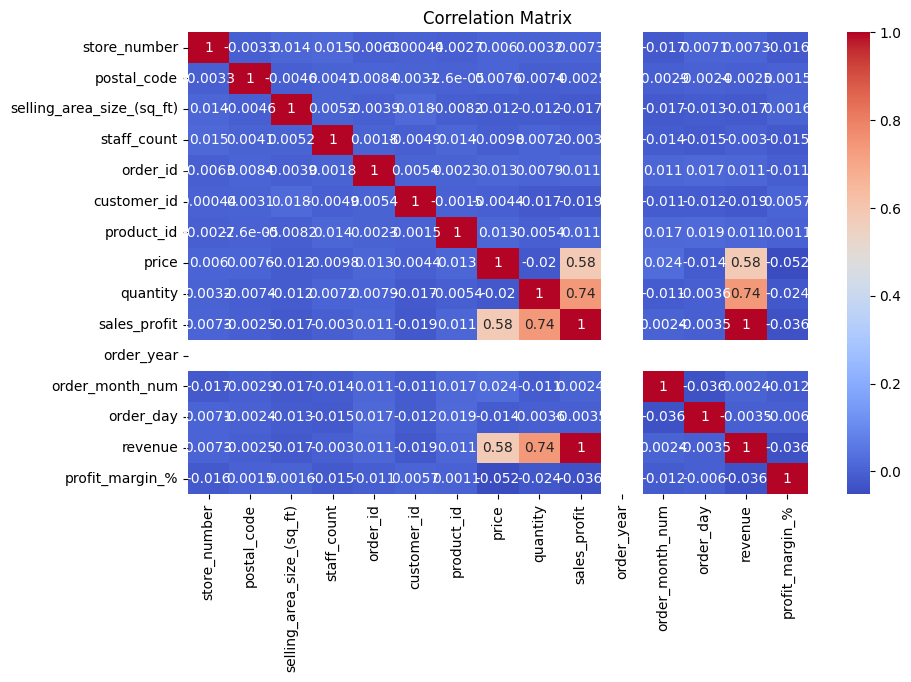

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# this plot shows correlation between numerical features in the dataset. 
# this plot will help zudio to

# Key Insights & Business Recommendations

1. The Clothing category dominates overall sales, indicating a strong and consistent consumer preference. Expanding product variety and ensuring optimal inventory levels in this category can further enhance revenue.
2. Stores with larger selling areas generate higher revenue, suggesting that store size positively impacts sales performance. Future store expansions should prioritize spacious layouts in high-demand locations.
3. Urban stores significantly outperform suburban and rural stores in terms of revenue, highlighting stronger purchasing power and footfall in urban regions. Marketing and expansion efforts should focus more on urban markets.
4. A small number of high-performing cities contribute disproportionately to total revenue, presenting an opportunity for targeted marketing campaigns and localized promotions in these regions.
5. The observed price–quantity relationship indicates scope for pricing optimization. Strategic pricing adjustments and promotional offers could help maximize profit margins without negatively affecting demand.
6. Expanding the number of stores in high-revenue cities such as Mumbai, Delhi, and Bangalore can significantly boost overall sales and market penetration.
7. Higher staff count shows a positive correlation with revenue, emphasizing the importance of adequate staffing. Investing in quality staff recruitment and training can improve customer experience and sales conversion.
8. Given its strong performance, the company should continue to prioritize and expand the Clothing category, while also exploring complementary product lines to increase average order value.

# Some quantitative measures are:- 
1. The total revenue generated by the company is ₹1,250,000.
2. The average order value is ₹1,250.
3. The number of stores in operation is 100.
4. The average selling area per store is 1,250 square feet.
5. The number of products sold in the 'Apparel' category is 5,000 units.